In [7]:
import osmnx as ox
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import random as rd
from IPython.display import clear_output
from shapely.wkt import loads as load_wkt
import matplotlib.cm as cm
import time
ox.config(log_console=True, use_cache=True)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


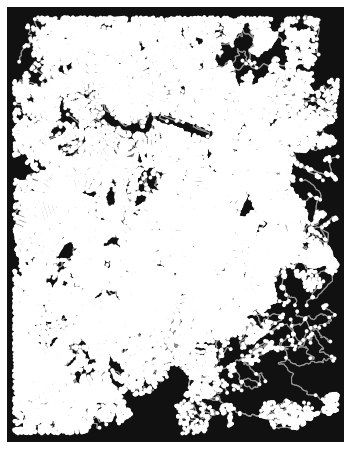

In [2]:
G = ox.graph_from_bbox(-19.7961,-20.0056,-44.0418,-43.8684,network_type='walk')

fig, ax = ox.plot_graph(G)

In [3]:
df = pd.read_excel(r'C:\Users\Vinicius Fernandes\Documents\GitHub\TCC\Dados\lista_enderecos_araujo\lista_enderecos_completa.xlsx')
df = pd.concat([df[['enderecos']], df['coordenadas'].str.split(', ', expand=True)], axis=1)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df

,enderecos,0,1
0,"Rua Curitiba, 327, Centro",-19.915654,-43.940298
1,"Rua Curitiba, 729, Centro",-19.919201,-43.941317
2,"Avenida Augusto de Lima, 744, Centro",-19.922607,-43.942935
3,"Rua da Bahia, 1070, Centro",-19.924362,-43.937421
4,"Avenida Afonso Pena, 2700, Funcionários",-19.935060,-43.929023
...,...,...,...
169,"Avenida Presidente Carlos Luz, 3001, Caiçaras",-19.891014,-43.967874
170,"Rua Vitório Marçola, 643, Anchieta",-19.947377,-43.924611
171,"Rua Izabel Bueno, 743, Indaiá",-19.863255,-43.950316
172,"Avenida General David Saranoff, 5160, Cidade I...",-19.946100,-44.021466


In [4]:
nodes_araujos = []

for i in range(len(df)):
    coordenada_lat = df.loc[i,0]
    coordenada_long = df.loc[i,1]
    location_point = (coordenada_lat,coordenada_long)
    origin_node = ox.get_nearest_node(G, location_point)
    nodes_araujos.append(origin_node)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

In [5]:
nodes_araujos

[321042284,
 29095724,
 2828780801,
 29095247,
 32449511,
 320926284,
 316646720,
 2823678724,
 8230853350,
 5376300742,
 5370380051,
 60591876,
 8978900281,
 5335304499,
 28296524,
 28635088,
 1307115209,
 449304360,
 2903602130,
 4986135629,
 29741053,
 61818316,
 29096247,
 6918856501,
 317757561,
 504707609,
 29288079,
 35789337,
 33078913,
 4449856595,
 1828145609,
 101043764,
 320407460,
 4696431319,
 33024422,
 8979260566,
 8905710882,
 2455781746,
 1248124036,
 4986055935,
 4987462491,
 4562661165,
 8976733542,
 8942106036,
 35965564,
 29095886,
 4972133043,
 8208235357,
 1314231500,
 4270893865,
 8934295040,
 316646683,
 5862308830,
 1307102930,
 2496065594,
 60730897,
 31899404,
 8218211880,
 2695243639,
 1583910468,
 6780186664,
 2618890653,
 2455731663,
 60749803,
 60672196,
 8272842447,
 8914547819,
 8979227736,
 8204936584,
 8914336975,
 6307190757,
 8139968506,
 316646951,
 79978691,
 2448001088,
 8914354027,
 2313580671,
 317769936,
 316639278,
 3712165766,
 8898994289,

In [6]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)  # Transforms nodes and edges into Geodataframes

nodes['menor_distancia_para_araujo'] = 0
nodes['araujo_mais_proxima'] = 0
route_lengths = []


In [8]:
count = 0
for node in G.nodes:
    start_time = time.time()
    route_length = 48094890489080489
    for araujo in nodes_araujos:
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
    count += 1
    if int(count/len(G.nodes)*100)%5 == 0:
        print(int(count/len(G.nodes)*100),'%')
        print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_12060/587329914.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['menor_distancia_para_araujo'][node] = route_length
C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_12060/587329914.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['araujo_mais_proxima'][node] = araujo_proxima


0 %
--- 20.870108127593994 seconds ---
0 %
--- 23.074281454086304 seconds ---
0 %
--- 20.644709825515747 seconds ---
0 %
--- 20.192206382751465 seconds ---
0 %
--- 19.931608200073242 seconds ---
0 %
--- 19.812286376953125 seconds ---
0 %
--- 13.63463807106018 seconds ---
0 %
--- 13.495361089706421 seconds ---
0 %
--- 13.354032278060913 seconds ---
0 %
--- 14.361305236816406 seconds ---
0 %
--- 13.299938917160034 seconds ---
0 %
--- 13.301547288894653 seconds ---
0 %
--- 23.716026544570923 seconds ---
0 %
--- 23.853895664215088 seconds ---
0 %
--- 24.66704487800598 seconds ---
0 %
--- 32.93301606178284 seconds ---
0 %
--- 32.80307936668396 seconds ---
0 %
--- 23.809290647506714 seconds ---
0 %
--- 22.268866300582886 seconds ---
0 %
--- 22.829800605773926 seconds ---
0 %
--- 22.046786308288574 seconds ---
0 %
--- 21.304064989089966 seconds ---
0 %
--- 21.019079446792603 seconds ---
0 %
--- 19.968709707260132 seconds ---
0 %
--- 18.306287050247192 seconds ---
0 %
--- 21.907029151916504 se

0 %
--- 21.260967016220093 seconds ---
0 %
--- 20.636574268341064 seconds ---
0 %
--- 20.403078317642212 seconds ---
0 %
--- 20.54483437538147 seconds ---
0 %
--- 21.030248880386353 seconds ---
0 %
--- 21.449706554412842 seconds ---
0 %
--- 22.798784017562866 seconds ---
0 %
--- 21.008294820785522 seconds ---
0 %
--- 22.9362313747406 seconds ---
0 %
--- 21.154424905776978 seconds ---
0 %
--- 18.529080629348755 seconds ---
0 %
--- 19.777249813079834 seconds ---
0 %
--- 19.802030563354492 seconds ---
0 %
--- 18.93209433555603 seconds ---
0 %
--- 19.230969667434692 seconds ---
0 %
--- 39.41164803504944 seconds ---
0 %
--- 40.245927572250366 seconds ---
0 %
--- 40.535820722579956 seconds ---
0 %
--- 40.04484248161316 seconds ---
0 %
--- 38.32620906829834 seconds ---
0 %
--- 41.31137180328369 seconds ---
0 %
--- 36.99158453941345 seconds ---
0 %
--- 40.321736335754395 seconds ---
0 %
--- 35.56068229675293 seconds ---
0 %
--- 32.235790729522705 seconds ---
0 %
--- 32.29184532165527 seconds -

0 %
--- 19.980838298797607 seconds ---
0 %
--- 14.116218328475952 seconds ---
0 %
--- 14.275460481643677 seconds ---
0 %
--- 14.222480058670044 seconds ---
0 %
--- 14.391284227371216 seconds ---
0 %
--- 14.844367742538452 seconds ---
0 %
--- 13.860049486160278 seconds ---
0 %
--- 13.880197763442993 seconds ---
0 %
--- 14.113023281097412 seconds ---
0 %
--- 14.011053800582886 seconds ---
0 %
--- 13.940521478652954 seconds ---
0 %
--- 13.57641315460205 seconds ---
0 %
--- 14.162741661071777 seconds ---
0 %
--- 13.923594951629639 seconds ---
0 %
--- 13.974847793579102 seconds ---
0 %
--- 13.664636850357056 seconds ---
0 %
--- 13.789160251617432 seconds ---
0 %
--- 13.908834218978882 seconds ---
0 %
--- 13.794718265533447 seconds ---
0 %
--- 13.576502323150635 seconds ---
0 %
--- 13.656760931015015 seconds ---
0 %
--- 14.386297941207886 seconds ---
0 %
--- 13.82264232635498 seconds ---
0 %
--- 13.7800133228302 seconds ---
0 %
--- 13.730873823165894 seconds ---
0 %
--- 13.69562315940857 sec

KeyboardInterrupt: 

In [ ]:
nodes.to_excel('aaa1.xlsx')

In [ ]:
def get_colors(n, cmap='seismic', start=0., stop=1.):

    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, 1) for r, g, b, _ in colors]
    return colors

def get_node_colors_by_attr(G, attr, cmap='seismic', start=0, stop=1, na_color='none'):

    #num_bins = len(G.nodes())
    num_bins = 10
    
    bin_labels = range(num_bins)
    
    attr_values = pd.Series(nodes[attr].values)  # Cretaes a dataframe ith the attribute of each node
    
    cats = pd.qcut(x=attr_values, q=num_bins, labels=bin_labels)  # Puts the values in bins
    
    colors = get_colors(num_bins, cmap, start, stop)  #List of colors of each bin
    node_colors = [colors[int(cat)] if pd.notnull(cat) else na_color for cat in cats]

    return node_colors

In [ ]:
nc = get_node_colors_by_attr(G, attr='menor_distancia_para_araujo')
nc
#ns = [80 if node == target_1 else 20 for node in G.nodes()]


In [ ]:
ns = [0]*len(G.nodes())
k = 0
for node in G.nodes():
    for node_araujo in nodes_araujos:
        #print(node)
        #print(node_araujo)
        if node == node_araujo:
            nc[k] = 'red'
            ns[k] = 30
            break
            #print('chegou aqui')
        else:
            ns[k] = 1
    k += 1

In [ ]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)

In [ ]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)
cmap = plt.cm.get_cmap('seismic')
norm=plt.Normalize(vmin=nodes['menor_distancia_para_araujo'].min(), vmax=nodes['menor_distancia_para_araujo'].max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cb.set_label('menor_distancia_para_araujo', fontsize = 20)
fig.savefig('demo.png')

In [ ]:
print('nós originais\n', list(G.nodes()))
print('\narestas originais\n', list(G.edges()))

In [ ]:
G_nx = nx.relabel.convert_node_labels_to_integers(G)
print('nós convertidos\n', list(G_nx.nodes()))
print('\narestas convertidas\n', list(G_nx.edges()))

In [ ]:
location_point = (-19.92798671024853, -43.94740898668482)
origin_node = ox.get_nearest_node(G, location_point)
origin_node

In [ ]:
shortest_path = nx.shortest_path(G,origin_node,2828035001)
ox.plot.plot_graph_route(G,shortest_path)

In [ ]:
rota_teste = [28801018, 8269807083]
ox.plot.plot_graph_route(G,rota_teste)

In [ ]:
weight = 'length'
print(list(nx.get_node_attributes(G, 'osmid').values()))
print(list(nx.get_edge_attributes(G, weight).values()))

In [ ]:
print('informações dos nós: ',G.nodes[28801018])
print('informações das arestas: ',G[28801018][8933734968])

In [ ]:
fig, ax = ox.plot_graph(G)

In [ ]:
nc = [0]*31

In [ ]:
for i in range(len(nc)):
    nc[i] = 'w'

In [ ]:
k=0
for node in G.nodes():

    if node == origin_node:

        nc[k] = str('red')
        k += 1
    else:
        nc[k] = str('w')
        k += 1

In [ ]:
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, node_color=nc)